# **Loan Application Status Prediction**

**Problem Statement:**<br>
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. <br>

**Independent Variables:**<br>

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**

- Loan_Status
<br>
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# import libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data

data = pd.read_csv('/content/sample_data/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# check shape
data.shape

(614, 13)

**Identifying the type of problem**

In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

 - We've onle column which is of int type "ApplicantIncome".
 - 8 columns are object type and 4 columns are float type.
 - Target column "Loan_Status" is of object type so we'll use classification.

## **EDA**

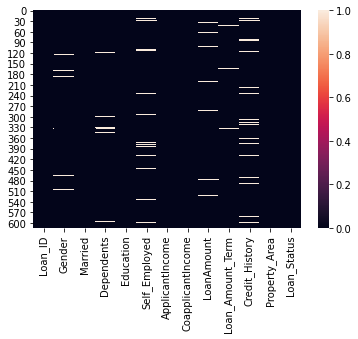

In [5]:
# checking null
import seaborn as sns

sns.heatmap(data.isnull())

In [11]:
# replacing null value by mode

datlist = data.columns.values
for i in range(0, len(datlist)):
  if data[datlist[i]].dtype == 'object':
    data[datlist[i]].fillna(data[datlist[i]].mode()[0],inplace=True)

In [13]:
# replacing int & float null values with mean

for i in range(0, len(datlist)):
  if data[datlist[i]].dtype != 'object':
    data[datlist[i]].fillna(data[datlist[i]].mean(),inplace=True)

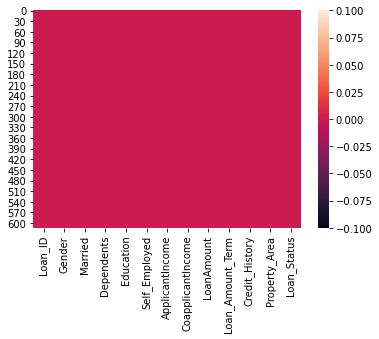

In [15]:
# check again null values

sns.heatmap(data.isnull())

 - There are no null now.

## **Univarient Analysis** 

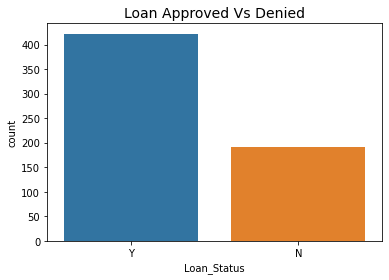

In [17]:
# let's visualise the data

import matplotlib.pyplot as plt

sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Approved Vs Denied', fontsize=14)
plt.show()

 - There are almost 450 ppl whos load approved and 163 ppl whos loan denied.

In [18]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

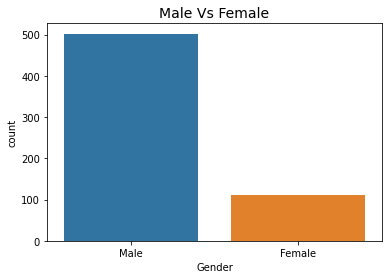

In [19]:
sns.countplot(x='Gender', data=data)
plt.title('Male Vs Female', fontsize=14)
plt.show()

 - There are 500 male and 113 female.

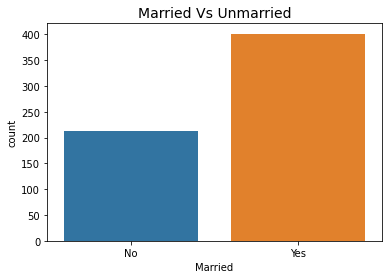

In [20]:
sns.countplot(x='Married', data=data)
plt.title('Married Vs Unmarried', fontsize=14)
plt.show()

We can say that married people applied for loan most.

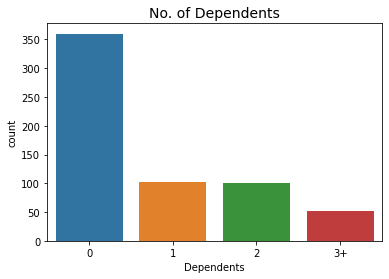

In [21]:
sns.countplot(x='Dependents', data=data)
plt.title('No. of Dependents', fontsize=14)
plt.show()

 - The people who dosen't have any dependents applied for loan most.

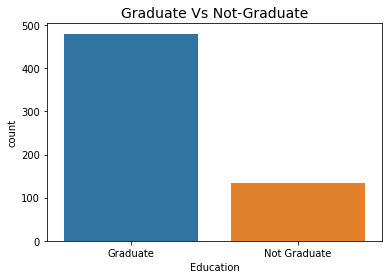

In [22]:
sns.countplot(x='Education', data=data)
plt.title('Graduate Vs Not-Graduate', fontsize=14)
plt.show()

 - Graduates majoritily applied for loan.

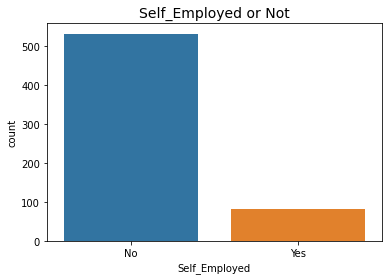

In [23]:
sns.countplot(x='Self_Employed', data=data)
plt.title('Self_Employed or Not', fontsize=14)
plt.show()

 - Those who are unemployed applied for loan most.

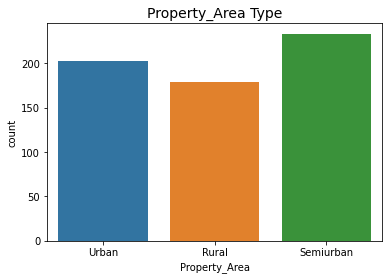

In [24]:
sns.countplot(x='Property_Area', data=data)
plt.title('Property_Area Type', fontsize=14)
plt.show()

 - Thos who has a property type 'Semiurban' applied for loan most.

# **Bi-Variate Analysis**

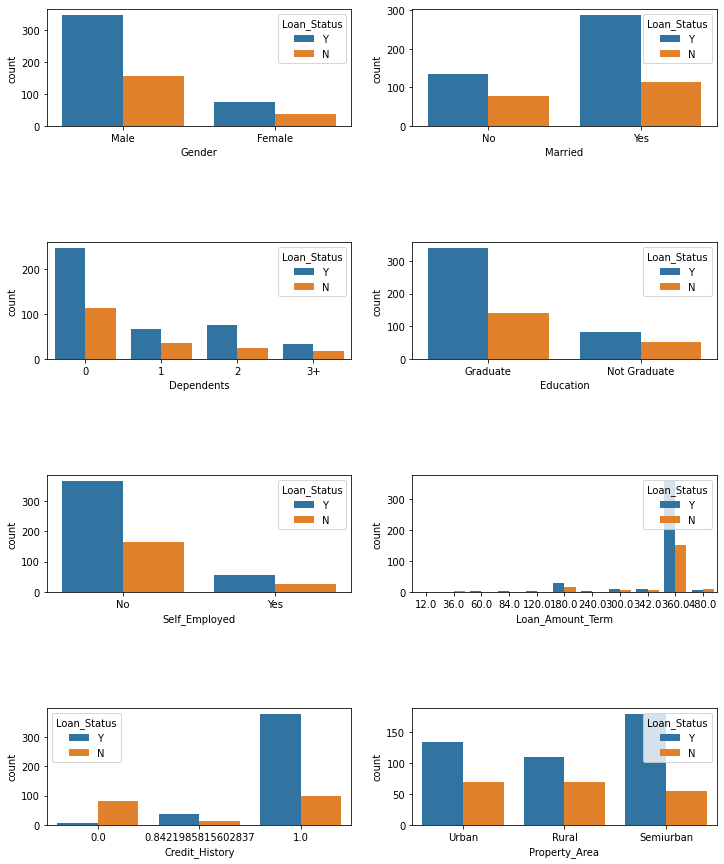

In [26]:
label_list = ['Gender',	'Married',	'Dependents',	'Education', 'Self_Employed', 'Loan_Amount_Term',	'Credit_History',	'Property_Area']
fig, axes = plt.subplots(4,2,figsize=(12,15))
for i,cat in enumerate(label_list):
  # get the size of each plot in row and column
  row,col = i//2,i%2  
  sns.countplot(x=cat, hue='Loan_Status', data=data, ax=axes[row,col])
plt.subplots_adjust(hspace=1)

 - Loan approval status - Near 70% loan gets approved.
 - Gender : As compared to female, majority male applied for loan and gets approved.
 - Marital_status : Majority married male applied for loan and gets approved majoritily.
 - Dependents : Many people have no dependents and their loan gets approved majoritily.
 - Education : majority of graduated people loan gets approved.
 - Self_employed : 80% of population is of unemployed.
 - Loan_Amount_Term : Those who applied loan for 360 months, their loan gets approved mostly.
 - Credit_History : Those who have credit cards whose loan approved mostly.
 - Property_Area : Semiurban applied for loan most and mostly approved.

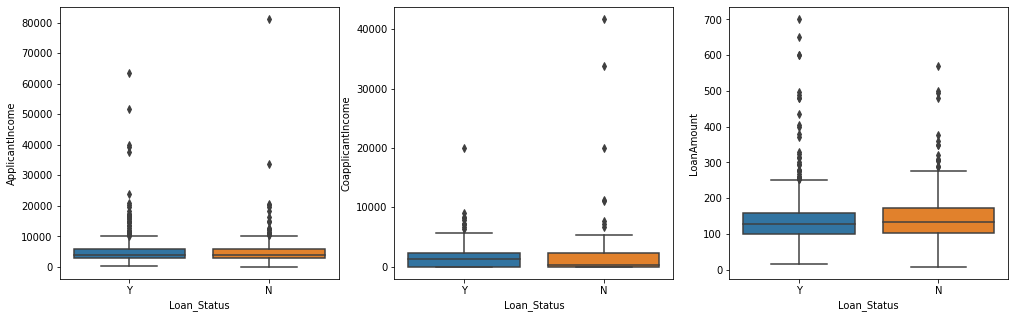

In [31]:
label_list = ['ApplicantIncome',	'CoapplicantIncome', 'LoanAmount']
fig, axes = plt.subplots(1,3,figsize=(17,5))
for i,cat_col in enumerate(label_list): 
  sns.boxplot(y=cat_col, x='Loan_Status', data=data, ax=axes[i])
plt.subplots_adjust(hspace=1)

 - There is no relation of numerical columns with Loan_Status.
 - Majority of outliers are there.

## **Multi-Variate Analysis**

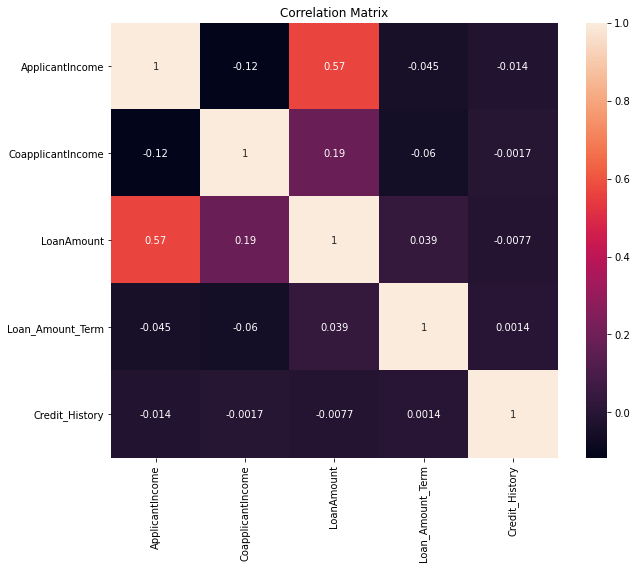

In [36]:
# checking correlation

plt.figure(figsize=(10,8))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

 - Loan_Status is categorical, so we can't see the correlation here.

# **Data Cleaning**

In [37]:
# drop Loan_ID, because it won't affect to data
data.drop(['Loan_ID'], axis=1, inplace=True)

## **Removing Skewness**

In [38]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [40]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
for i in data.columns:
  if data[i].dtypes != 'object':
    if ((len(pd.unique(data[i]))) > 3):
      if abs(data.loc[:,i].skew()) > 0.55:
        data.loc[:,i]=pt.fit_transform(data.loc[:,i].values.reshape(-1,1))

# **Label Encoding**

In [62]:
import warnings
warnings.filterwarnings('ignore')

label_list1 = list(data.select_dtypes(['object']).columns)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in label_list1:
  data[i] = le.fit_transform(data[i])

In [63]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.185905,1.0,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.185905,1.0,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.185905,1.0,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.185905,1.0,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.185905,1.0,2,1


# **Removing Outliers**

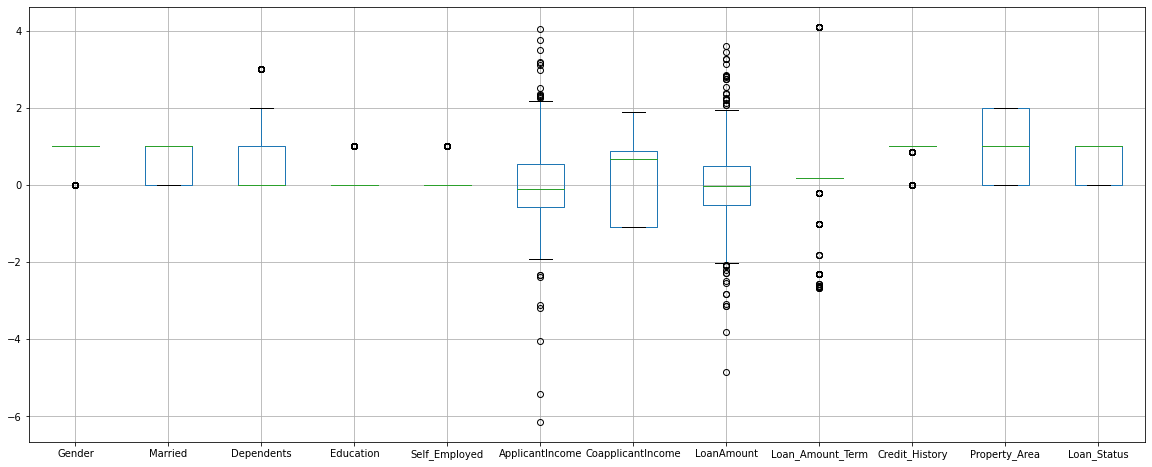

In [64]:
import matplotlib.pyplot as plt
data.boxplot(figsize=[20,8])
plt.subplots_adjust()
plt.show()

In [65]:
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
       185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378, 409,
       443, 468, 500, 500, 516, 555, 561, 568, 573, 600]), array([7, 8, 7, 8, 7, 8, 7, 5, 7, 8, 5, 7, 8, 5, 5, 5, 8, 8, 8, 8, 5, 8,
       8, 7, 8, 5, 5, 5, 5, 8, 8, 7, 7, 7, 8, 5]))


In [67]:
# removing outliers
z = np.abs(zscore(data))
threshold=3
new_data = data[(z<3).all(axis=1)]
print(data.shape)
print(new_data.shape)

(614, 12)
(582, 12)


In [68]:
# check how much data we lost

loss_percent = (614-582)/614*100
print(loss_percent)

5.211726384364821


We lost 5% of data, which is ok.

# **Split the data**

In [ ]:
y = data['Loan_Status']
X = data.drop('Loan_Status',axis=1, inplace=True)

In [82]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [81]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.185905,1.0,2
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.185905,1.0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.185905,1.0,2
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.185905,1.0,2
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.185905,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.554885,-1.102837,-1.205100,0.185905,1.0,0
610,1,1,3,0,0,-0.000290,-1.102837,-2.293317,-2.308570,1.0,0
611,1,1,1,0,0,1.023487,0.208603,1.372409,0.185905,1.0,2
612,1,1,2,0,0,0.931750,-1.102837,0.738924,0.185905,1.0,2


# **Scaling**

In [83]:
X = data

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scale_X, index=X.index, columns=X.columns)
X = scaled_X
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.657450,0.000000,0.602410,0.421646,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.620785,0.618705,0.570129,0.421646,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.554899,0.000000,0.415415,0.421646,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.530946,0.665810,0.554733,0.421646,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.661229,0.000000,0.593333,0.421646,1.0,1.0


# **Finding the Best Random State**

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc

maxAcc = 0
maxRS = 0
for i in range(1400,1450):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
  lr = LogisticRegression()
  lr.fit(X_train,y_train)
  predrf = lr.predict(X_test)
  acc = accuracy_score(y_test, predrf)

  if acc > maxAcc:
    maxAcc = acc
    maxRS = i
print('Best Accuracy on',maxAcc,'Random State ',maxRS)

Best Accuracy on 0.8810810810810811 Random State  1424


# **Train Test Split**

In [92]:
train_test_split(X, y, test_size=0.30, random_state=1424)

[     Gender  Married  ...  Credit_History  Property_Area
 493     0.0      0.0  ...             1.0            0.5
 17      0.0      0.0  ...             0.0            1.0
 477     1.0      1.0  ...             0.0            0.5
 546     1.0      0.0  ...             1.0            0.5
 105     1.0      1.0  ...             1.0            1.0
 ..      ...      ...  ...             ...            ...
 92      1.0      1.0  ...             1.0            1.0
 174     1.0      1.0  ...             1.0            0.5
 176     1.0      1.0  ...             1.0            0.0
 394     1.0      1.0  ...             1.0            1.0
 185     1.0      1.0  ...             1.0            0.5
 
 [429 rows x 11 columns],
      Gender  Married  ...  Credit_History  Property_Area
 113     0.0      0.0  ...        1.000000            0.5
 251     0.0      0.0  ...        1.000000            1.0
 195     1.0      1.0  ...        1.000000            0.5
 448     1.0      1.0  ...        0.000000  

# **Finding Best Algorithm**

In [98]:
# importing all the required libraries to find the best algorithm

from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = [LogisticRegression(), BernoulliNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

In [102]:
for m in model:
  m.fit(X_train,y_train)
  pred = m.predict(X_test)
  print('Accuracy Score of ',m)
  print(accuracy_score(y_test,pred))
  print('----------------------------------------------------------------')
  print(confusion_matrix(y_test,pred))
  print('----------------------------------------------------------------')
  print(classification_report(y_test,pred))
  print('----------------------------------------------------------------')
  score = cross_val_score(m,X,y,cv=5)
  print(score)
  print('----------------------------------------------------------------')
  print(score.mean())
  print('----------------------------------------------------------------')
  print('Difference between cross validation and accuracy score is', accuracy_score(y_test,pred)-score.mean())
  print('===================================================================================================')


Accuracy Score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8540540540540541
----------------------------------------------------------------
[[ 25  26]
 [  1 133]]
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.49      0.65        51
           1       0.84      0.99      0.91       134

    accuracy                           0.85       185
   macro avg       0.90      0.74      0.78       185
weighted avg       0.87      0.85      0.84       185

----------------------------------------------------------------
[0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
----------------------------------

# **Hyper Parameter Tuning**

In [104]:
from sklearn.model_selection import RandomizedSearchCV

param = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,15,20],
         'max_features' : [3,5,7,9],
         'min_samples_leaf': [2,3,4,5,6] }

clf = RandomizedSearchCV(RandomForestClassifier(), param)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 5}

In [105]:
# predicting result based on test model

clf_pred = clf.best_estimator_.predict(X_test)

In [106]:
accuracy_score(y_test, clf_pred)

0.8540540540540541

 - Our model learnt almost 85% which is nice.

In [107]:
print(accuracy_score(y_test, clf_pred))
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

0.8540540540540541
[[ 26  25]
 [  2 132]]
              precision    recall  f1-score   support

           0       0.93      0.51      0.66        51
           1       0.84      0.99      0.91       134

    accuracy                           0.85       185
   macro avg       0.88      0.75      0.78       185
weighted avg       0.86      0.85      0.84       185



# **AUC ROC Curve**

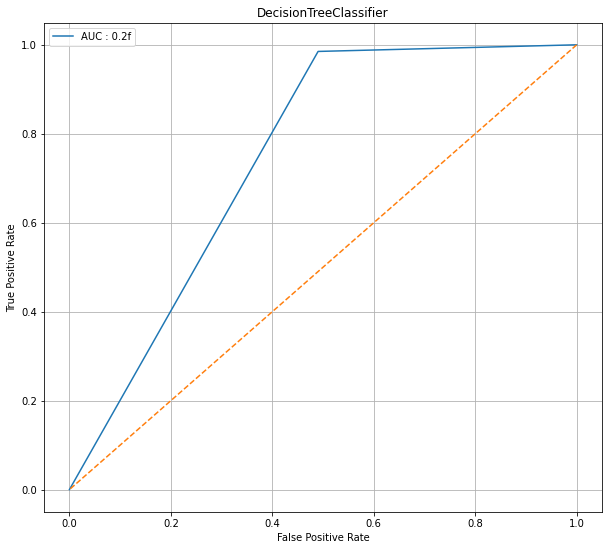

In [111]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, treshold = roc_curve(y_test, clf_pred)
# model accuracy
rf_auc = auc(fpr, tpr)
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label='AUC : 0.2f' %rf_auc)
plt.plot([1,0],[1,0],linestyle='--')
# adding accuracy score at bottom right
plt.legend(loc=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier')
plt.grid()

# **Saving the Model**

In [112]:
import joblib

joblib.dump(clf.best_estimator_,'Loan_Prediction.obj')
SVR_from_joblib = joblib.load('Loan_Prediction.obj')
predicted = SVR_from_joblib.predict(X_test)
predicted

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1])

In [113]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.DataFrame([SVR_from_joblib.predict(X_test)[:],y_test[:]],index=['Predicted', 'original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184
Predicted,1,0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1
original,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1
